1. Used random forest regressor
2. Shape - (6926, 13)
3. It has null values
4. It has duplicate values
5. Used Linear regression impoutation and mode to fill null values


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car_price_prediction.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.shape

(8128, 13)

In [ ]:

df.duplicated().any()

True

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(6926, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

<Axes: >

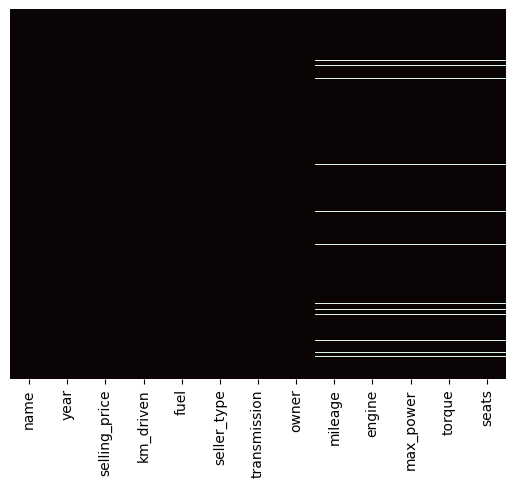

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [ ]:
# import pandas as pd

# correlation_matrix = df.corr()

# correlation_threshold = 0.8
# highly_correlated_columns = set()

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
#             colname = correlation_matrix.columns[i]
#             highly_correlated_columns.add(colname)

# columns_to_drop = list(highly_correlated_columns)

# df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

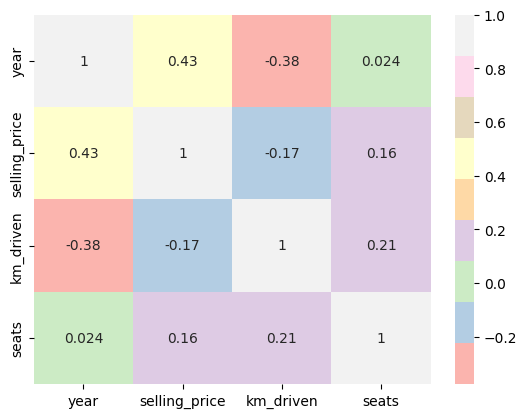

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Pastel1")
plt.show()

### Seats and year has to lowest correlation
### selling price and year had the highest correlation

In [ ]:
df['mileage'] = df['mileage'].str.strip('kmpl').str.strip('km/kg')
df['engine'] = df['engine'].str.strip('CC')
df['max_power'] = df['max_power'].str.strip('bhp').str.strip()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
import re
import pandas as pd

def extract_numeric_torque(torque_str):
    if isinstance(torque_str, str):
        # Extract the first numeric value
        numeric_match = re.search(r'\d+', torque_str)
        numeric_value = int(numeric_match.group()) if numeric_match else None
        return numeric_value
    else:
        return torque_str


# Apply the extract_numeric_torque function to the 'torque' column and replace the entire column
df['torque'] = df['torque'].apply(extract_numeric_torque)

# Display the result



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
imputer = IterativeImputer()

# Fit and transform the imputer on your data
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Check for missing values
print(df.isnull().sum())


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque             0
seats              0
dtype: int64


In [ ]:
# import pandas as pd

def remove_nulls_with_mode(df, cat_cols):
    df_no_nulls = df.copy()

    # Iterate through each categorical column
    for col in cat_cols:
        # Find the mode for the column
        mode_value = df[col].mode().values[0]

        # Replace missing values with the mode
        df_no_nulls[col].fillna(mode_value, inplace=True)

    return df_no_nulls

cat_cols = ['max_power','mileage','engine']
df = remove_nulls_with_mode(df, cat_cols)

In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [ ]:

df['age'] = 2024 - df['year']
df.drop(['year'],axis = 1,inplace = True)
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3})
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000.0,145500.0,Diesel,Individual,Manual,1,23.4,1248,74,190.0,5.0,10.0
1,Skoda Rapid 1.5 TDI Ambition,370000.0,120000.0,Diesel,Individual,Manual,2,21.14,1498,103.52,250.0,5.0,10.0
2,Honda City 2017-2020 EXi,158000.0,140000.0,Petrol,Individual,Manual,3,17.7,1497,78,12.0,5.0,18.0
3,Hyundai i20 Sportz Diesel,225000.0,127000.0,Diesel,Individual,Manual,1,23.0,1396,90,22.0,5.0,14.0
4,Maruti Swift VXI BSIII,130000.0,120000.0,Petrol,Individual,Manual,1,16.1,1298,88.2,11.0,5.0,17.0


In [ ]:

df['mileage'] = pd.to_numeric(df['mileage'])
df['engine'] = pd.to_numeric(df['engine'])
df['max_power'] = pd.to_numeric(df['max_power'])

In [ ]:
df['seats'] = df['seats'].astype(str)

In [ ]:
# df

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Selling Price in Rupee", "Total KM Driven", "Fuel Efficiency in KM per litre",
                                                   "Engine CC", "Brake Horse Power(BHP)", "Age of Car","Number of Seats"))

fig.add_trace(
    go.Histogram(x=df['selling_price'], name="Rupee"),
    row=1, col=1
)

fig.add_trace(
   go.Histogram(x=df['km_driven'], name="KM"),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['mileage'], name="KM/L"),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=df['engine'], name="CC"),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x=df['max_power'], name="BHP"),
    row=3, col=1
)

fig.add_trace(
    go.Histogram(x=df['age'], name="Years"),
    row=3, col=2
)



fig.update_layout(height=1400, width=800, title_text="Distribution of numerical data")
fig.show()

### Most of the vehicles have milege of 18 to 25 kmph

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Selling Price in Rupee", "Total KM Driven", "Fuel Efficiency in KM per litre",
                                                   "Engine CC", "Brake Horse Power(BHP)", "Age of Car","Number of Seats"))

fig.add_trace(
    go.Box(x=df['selling_price'], name="Rupee"),
    row=1, col=1
)

fig.add_trace(
   go.Box(x=df['km_driven'], name="KM"),
    row=1, col=2
)

fig.add_trace(
    go.Box(x=df['mileage'], name="KM/L"),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=df['engine'], name="CC"),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=df['max_power'], name="BHP"),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=df['age'], name="Years"),
    row=3, col=2
)



fig.update_layout(height=1400, width=800, title_text="Distribution of numerical data")
fig.show()


### Engine CC, Brake horse power and age of car have more outliers

In [ ]:
count_fuel = df['fuel'].value_counts().reset_index()
count_fuel = count_fuel.rename(columns = {'index':'fuel','fuel':'count'})

count_seller = df['seller_type'].value_counts().reset_index()
count_seller = count_seller.rename(columns = {'index':'seller_type','seller_type':'count'})

count_transmission = df['transmission'].value_counts().reset_index()
count_transmission = count_transmission.rename(columns = {'index':'transmission','transmission':'count'})

count_owner = df['owner'].value_counts().reset_index()
count_owner = count_owner.rename(columns = {'index':'owner','owner':'count'})

count_seats = df['seats'].value_counts().reset_index()
count_seats = count_seats.rename(columns = {'index':'seats','seats':'count'})

In [ ]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Fuel Type", "Seller Type", "Transmission Type",
                                                   "Number of Owners", "Number of Seats"))

fig.add_trace(
    go.Bar(y=count_fuel['count'], x=count_fuel['fuel'], name="Fuel type"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=count_seller['count'], x=count_seller['seller_type'], name="Seller type"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y=count_transmission['count'], x=count_transmission['transmission'], name="Transmission"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y=count_owner['count'], x=count_owner['owner'], name="Number of owners"),
    row=2, col=2
)

fig.add_trace(
    go.Bar(y=count_seats['count'], x=count_seats['seats'], name="Number of seats"),
    row=3, col=1
)

fig.update_layout(height=1000, width=800, title_text="Distribution of categorical data")
fig.show()

### As CNG and LPG are less in numbers in fuel_type, we removed it.
### In seller type indiviual is higher.
### In transmission type manual is higher.
### Most of the vehicles have only one owner

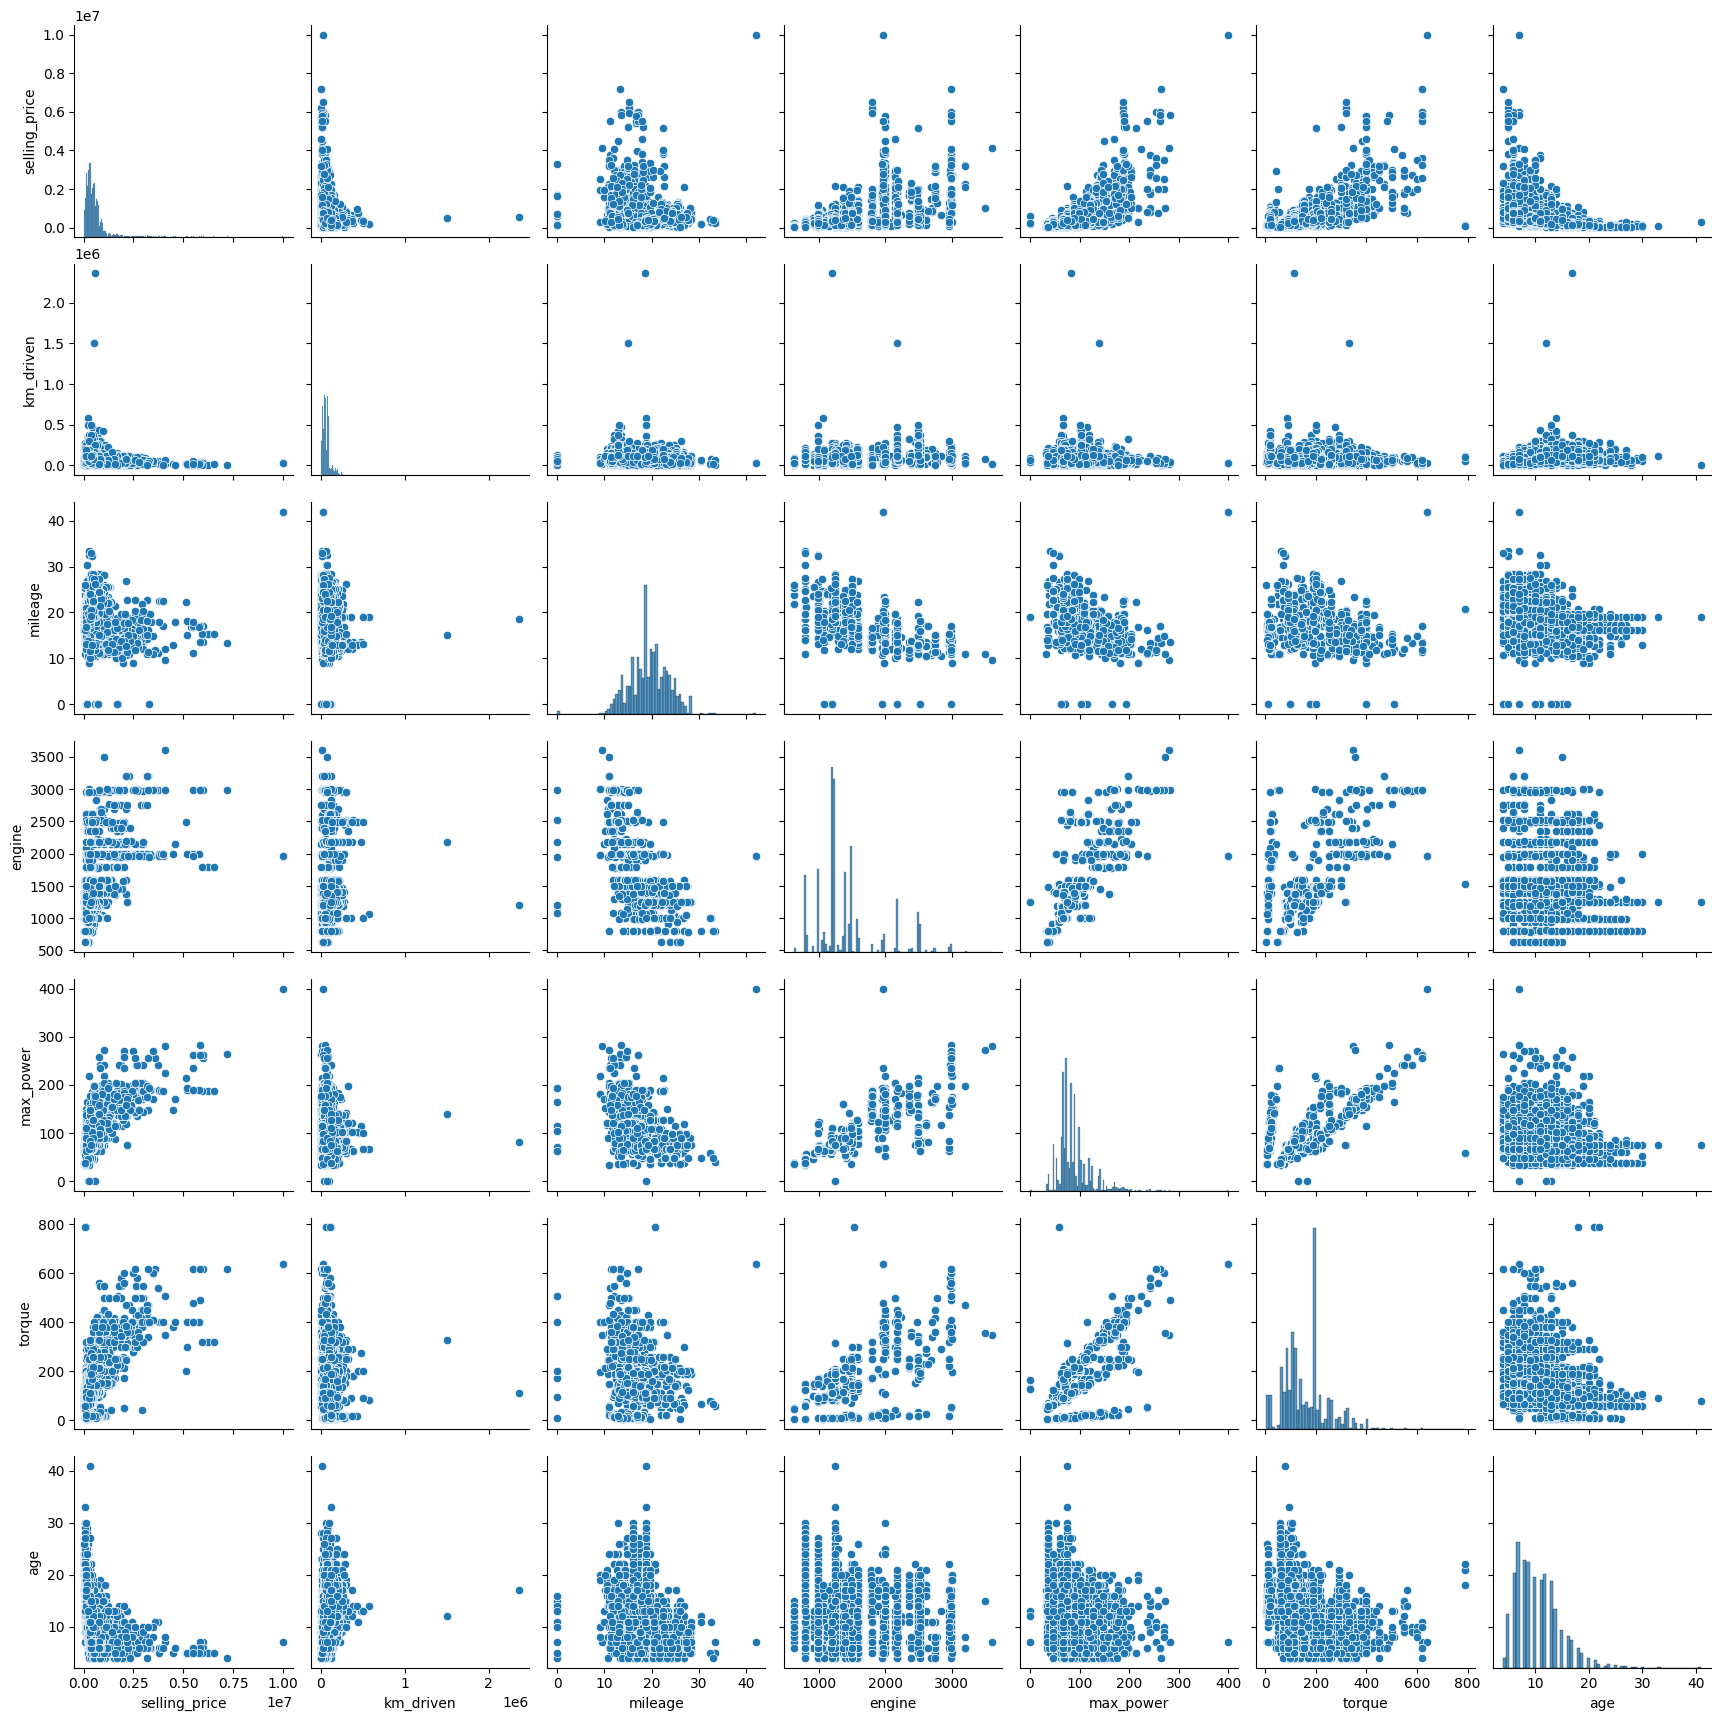

In [ ]:
sns.pairplot(df)

### Torque and max_power are somewhat linearly correlated

In [ ]:
# Make a copy of the data for modelling
df_model = df.copy()

# Create the 'brand' column by splitting the 'name' column
df_model['brand'] = df_model['name'].str.split(' ').str.get(0)
df_model.drop(['name'],axis=1,inplace=True)

# Filter the outlier and log-transform the target variable('selling_price')
df_model = df_model[df_model['selling_price'] < 2500000]
df_model['selling_price'] = np.log(df_model['selling_price'])

# Filter the outlier in 'km_driven' feature
df_model = df_model[df_model['km_driven'] < 300000]

# Filter the unwanted rows in 'fuel' feature
df_model = df_model[~df_model['fuel'].isin(['CNG','LPG'])]

# Filter the outliers in 'mileage' feature
df_model = df_model[(df_model['mileage'] > 5) & (df_model['mileage'] < 35)]

# Filter the outlier in 'max_power' feature and log-transform the data.
df_model = df_model[df_model['max_power'] < 300]
df_model['max_power'] = np.log(df_model['max_power'])

# Log-transform the 'age' feature data.
df_model['age'] = np.log(df_model['age'])


# Show the first five records of the feature engineered DataFrame.
df_model.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,13.017003,145500.0,Diesel,Individual,Manual,1,23.40,1248,4.304065,190.0,5.0,2.302585,Maruti
1,12.821258,120000.0,Diesel,Individual,Manual,2,21.14,1498,4.639765,250.0,5.0,2.302585,Skoda
2,11.970350,140000.0,Petrol,Individual,Manual,3,17.70,1497,4.356709,12.0,5.0,2.890372,Honda
3,12.323856,127000.0,Diesel,Individual,Manual,1,23.00,1396,4.499810,22.0,5.0,2.639057,Hyundai
4,11.775290,120000.0,Petrol,Individual,Manual,1,16.10,1298,4.479607,11.0,5.0,2.833213,Maruti


In [ ]:
df_model = pd.get_dummies(data = df_model, drop_first=True)
df_model.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'age', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer',
       ...
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Peugeot',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo'],
      dtype='object', length=252)

In [ ]:
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.fillna(df.mean(), inplace=True)
# df_model.fillna(1e10, inplace=True)

In [ ]:
if df_model.shape[0] > 2000:
  df_dup = df_model.head(500)
else:
  df_dup = df_model

X = df_dup.drop(['selling_price'],axis=1)
y = df_dup['selling_price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (400, 251)
x test:  (100, 251)
y train:  (400,)
y test:  (100,)


In [ ]:
def custom_standard_scaler(data, features):
    normalized_data = data.copy()

    for feature in features:
        mean_value = data[feature].mean()
        std_value = data[feature].std()

        normalized_data[feature] = (data[feature] - mean_value) / std_value

    return normalized_data

num_var = ['km_driven', 'mileage', 'engine', 'max_power', 'age','torque']

X_train = custom_standard_scaler(X_train, num_var)
X_test = custom_standard_scaler(X_test, num_var)
X_train

,km_driven,mileage,engine,max_power,torque,age,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
111,0.790446,-0.105671,0.060621,-0.565336,-0.195586,-0.471182,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
362,-0.919248,-1.240415,1.683039,2.155576,3.050637,0.386143,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73,-0.121391,0.233417,-0.396646,-0.161130,-0.489584,0.835878,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
529,-0.440534,0.382936,-0.834128,-0.650045,-0.746831,0.835878,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,-1.375167,-0.903997,-1.278204,-2.446587,-1.126578,2.371870,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-0.577309,0.305506,-0.394448,-0.654546,-0.575333,-0.471182,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
214,-0.349350,2.380085,-0.284528,-0.353820,0.478158,-1.245665,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
121,-0.349350,0.049188,0.449737,1.256408,1.323401,-0.471182,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
49,-0.855419,-1.251095,1.683039,1.121924,0.600657,0.129554,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (400, 251)
x test:  (100, 251)
y train:  (400,)
y test:  (100,)


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Create and fit the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.23494414158020058
Mean Squared Error: 0.0908445278167647
R-squared: 0.8117447910804457


In [ ]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            bootstrap_X = X.iloc[bootstrap_indices].reset_index(drop=True)
            bootstrap_y = y.iloc[bootstrap_indices].reset_index(drop=True)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))

        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)

        return np.mean(predictions, axis=1)

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'value': np.mean(y)}

        # Find the best split
        best_split = self._find_best_split(X, y)

        # If no split is found, create a leaf node
        if best_split is None:
            return {'value': np.mean(y)}

        feature_index, threshold = best_split

        # Split the data
        left_mask = X.iloc[:, feature_index] <= threshold
        right_mask = ~left_mask

        # Recursively build the left and right subtrees
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_index': feature_index,
            'threshold': threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape

        if num_samples <= self.min_samples_split:
            return None

        # Calculate the variance of the target values
        current_variance = np.var(y)

        best_split = None
        best_variance_reduction = 0

        for feature_index in range(num_features):
            # Sort the feature values
            feature_values = np.sort(np.unique(X.iloc[:, feature_index]))

            for threshold in feature_values:
                # Split the data
                left_mask = X.iloc[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                # Calculate the variance reduction
                left_variance = np.var(y[left_mask])
                right_variance = np.var(y[right_mask])
                variance_reduction = current_variance - (len(y[left_mask]) / len(y) * left_variance +
                                                          len(y[right_mask]) / len(y) * right_variance)

                # Update the best split if needed
                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_split = (feature_index, threshold)

        return best_split

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X.values])

    def _predict_tree(self, x, tree):
        if 'value' in tree:
            return tree['value']

        if x[tree['feature_index']] <= tree['threshold']:
            return self._predict_tree(x, tree['left'])
        else:
            return self._predict_tree(x, tree['right'])


rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)
rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

accuracy = np.mean(np.abs(predictions - y_test))
print(f"Mean Absolute Error : {accuracy}")
mse = mean_squared_error(predictions,y_test)
print("Mean squared error:",mse)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Absolute Error : 0.2330716896280608
Mean squared error: 0.09443215314598336
R-squared: 0.8043102303852829
